In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), _ = mnist.load_data()

In [2]:
import numpy as np
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]**2))
x_train = x_train.astype("float32") / 255

print(f"shape: {x_train.shape}")
print(f"max: {np.max(x_train)} - min: {np.min(x_train)}")

shape: (60000, 784)
max: 1.0 - min: 0.0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def build_model():
    model = Sequential([
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax")
    ])

    model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
    return model

In [4]:
K = 4
num_samples = len(x_train) // K
history_acc = []
history_loss = []

for i in range(K):
    print(f"processing fold #{i+1}")
    x_val = x_train[i*num_samples: (i+1)*num_samples]
    y_val = y_train[i*num_samples: (i+1)*num_samples]
    x = np.concatenate([x_train[:i*num_samples], x_train[(i+1)*num_samples:]])
    y = np.concatenate([y_train[:i*num_samples], y_train[(i+1)*num_samples:]])

    model = build_model()
    res = model.fit(x, y,
                    epochs=10,
                    batch_size=32,
                    verbose=0,
                    validation_data=(x_val, y_val)
                    )
    history_acc.append(res.history["val_accuracy"])
    history_loss.append(res.history["val_loss"])

processing fold #1
processing fold #2
processing fold #3
processing fold #4


In [5]:
mean_acc = [np.mean([acc[epoch] for acc in history_acc]) for epoch in range(10)]
mean_loss = [np.mean([loss[epoch] for loss in history_loss]) for epoch in range(10)]

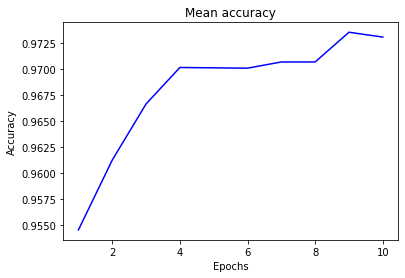

In [6]:
import matplotlib.pyplot as plt
x_range = range (1, 11)
plt.plot(x_range, mean_acc, "b")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Mean accuracy")
plt.show()

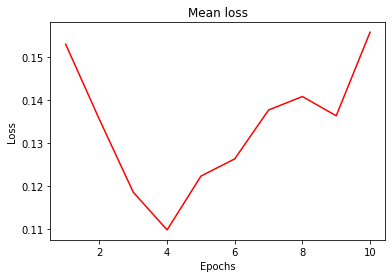

In [7]:
plt.plot(x_range, mean_loss, "r")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Mean loss")
plt.show()